In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt

# set the CARMA model parameters
sigmay = 2.3  # dispersion in the time series
p = 5  # order of the AR polynomial
mu = 17.0  # mean of the time series
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0])  # widths of of Lorentzian components
qpo_cent = np.array([1.0/5.0, 1.0/25.0])  # centroids of Lorentzian components
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) # compute the roots r_k from the Lorentzian function parameters
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
# convert CARMA model variance to variance in the driving white noise
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)  # carma_variance computes the autcovariance f

Text(0,0.5,'magnitud')

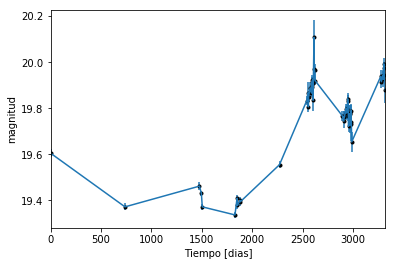

In [3]:
data = np.genfromtxt('LC_G_141827.dat')
juldate = data[:,0]  # time is given by the julian date
t = juldate - juldate.min()  # set first time value to zero for convenience. units of t are days.
y = data[:,1]  # i-band magnitudes
yerr = data[:,2]  # standard deviation in the measurement noise

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('magnitud')

In [4]:
model = cm.CarmaModel(t, y, yerr, p=5, q=4)

In [5]:
%%capture capt
sample = model.run_mcmc(20000)

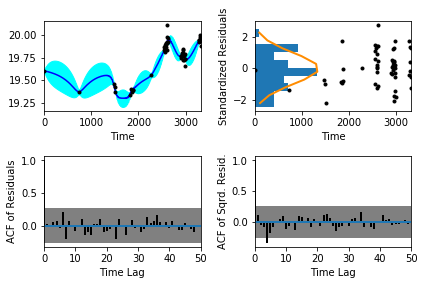

In [6]:
sample.assess_fit()

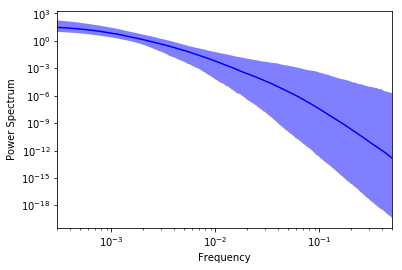

In [7]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [8]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.000376389,0.0736159,'Nivel de ruido')

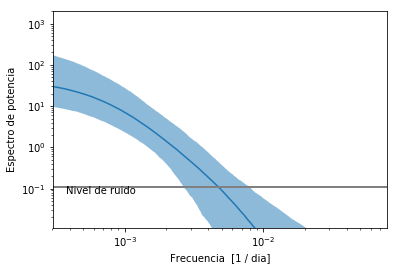

In [9]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia')
plt.xlabel('Frecuencia  [1 / dia]')
plt.annotate("Nivel de ruido", (1.25* plt.xlim()[0], noise_level / 1.5))

In [10]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [11]:
centroid_samples = sample.get_samples('psd_centroid')
centroid_samples.shape

(20000, 5)

In [12]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 375.633473434
Median: 0.0262414465888
Standard deviation: 0.235748053206
68% credibility interval: [ 0.          0.34936862]
95% credibility interval: [ 0.          0.85622017]
99% credibility interval: [ 0.          0.96533819]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 375.633473434
Median: 0.0262414465888
Standard deviation: 0.235748053206
68% credibility interval: [ 0.          0.34936862]
95% credibility interval: [ 0.          0.85622017]
99% credibility interval: [ 0.          0.96533819]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 689.723226779
Median: 0.0
Standard deviation: 0.00730292238949
68% cre

Plotting parameter summary


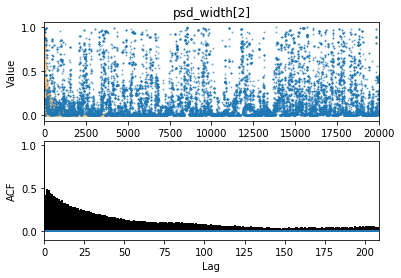

In [13]:
sample.plot_parameter('psd_width', 2, doShow=True)

In [14]:
centroid_samples = sample.get_samples('logpost')
centroid_samples.shape

(20000, 1)

In [15]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 578.527695349
Median: 106.956884673
Standard deviation: 1.73395723049
68% credibility interval: [ 105.11130133  108.28352157]
95% credibility interval: [ 102.61616616  109.45780019]
99% credibility interval: [ 100.63300298  109.95138666]


In [16]:
centroid_samples = sample.get_samples('ar_coefs')
centroid_samples.shape

(20000, 6)

In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 359.917539017
Median: 1.49052154896
Standard deviation: 2.32809256474
68% credibility interval: [ 0.27803526  4.67898459]
95% credibility interval: [ 0.05616856  8.092031  ]
99% credibility interval: [  0.02709659  11.40601347]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 375.809145259
Median: 0.975044628809
Standard deviation: 9.36681126216
68% credibility interval: [  0.07559372  10.11642737]
95% credibility interval: [  6.39273175

In [18]:
centroid_samples = sample.get_samples('ma_coefs')
centroid_samples.shape

(20000, 5)

In [19]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 1372.24211861
Median: 1.02536521604e-18
Standard deviation: 376.315380986
68% credibility interval: [  7.27761076e-40   1.17368619e-06]
95% credibility interval: [  5.93800149e-62   2.65801428e+00]
99% credibility interval: [  1.83675216e-70   7.06709452e+01]
Posterior summary for parameter ma_coefs  element 2
----------------------------------------------
Effective number of independent samples: 4269.53688591
Median: 2.47040686068e-11
Standard deviation: 1120.27423774
68% credibility interval: [  1.03483867e-28   7.45388741e-

In [20]:
centroid_samples = sample.get_samples('mu')
centroid_samples.shape

(20000, 1)

In [21]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2772.6959079
Median: 19.6120292919
Standard deviation: 0.134148650484
68% credibility interval: [ 19.50303601  19.72807275]
95% credibility interval: [ 19.35559465  19.89415707]
99% credibility interval: [ 19.18074001  20.06225563]


In [22]:
centroid_samples = sample.get_samples('psd_centroid')
centroid_samples.shape

(20000, 5)

In [23]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 375.633473434
Median: 0.0262414465888
Standard deviation: 0.235748053206
68% credibility interval: [ 0.          0.34936862]
95% credibility interval: [ 0.          0.85622017]
99% credibility interval: [ 0.          0.96533819]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 375.633473434
Median: 0.0262414465888
Standard deviation: 0.235748053206
68% credibility interval: [ 0.          0.34936862]
95% credibility interval: [ 0.          0.85622017]
99% credibility interval: [ 0.          0.96533819]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 689.723226779
Median: 0.0
Standard deviation: 0.00730292238949
68% cre

In [24]:
centroid_samples = sample.get_samples('loglik')
centroid_samples.shape

(20000, 1)